In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/supermarket_sales.csv')
df.head()



,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [2]:
df.shape
df.info()
df.describe()
df.columns
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

df.duplicated().sum()

df = df.drop_duplicates()



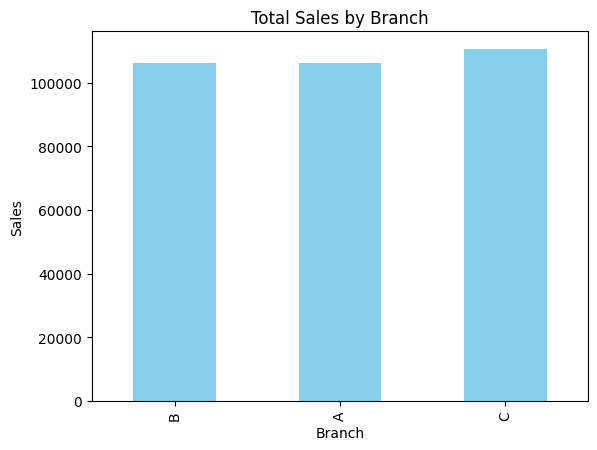

In [10]:
branch_sales = df.groupby('Branch')['Total'].sum().sort_values()
branch_sales.plot(kind='bar', title='Total Sales by Branch', ylabel='Sales', xlabel='Branch', color='skyblue')
plt.show()

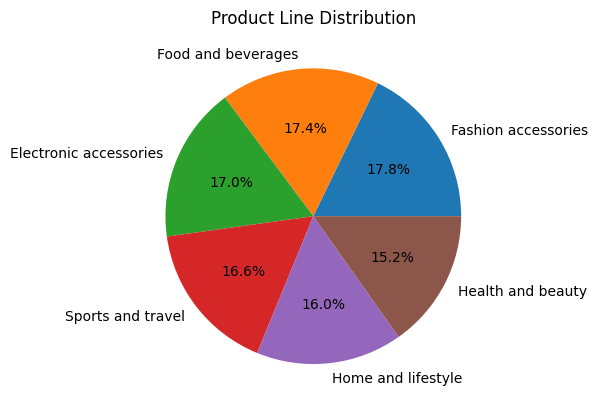

In [11]:
df['Product line'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Product Line Distribution')
plt.ylabel('')
plt.show()

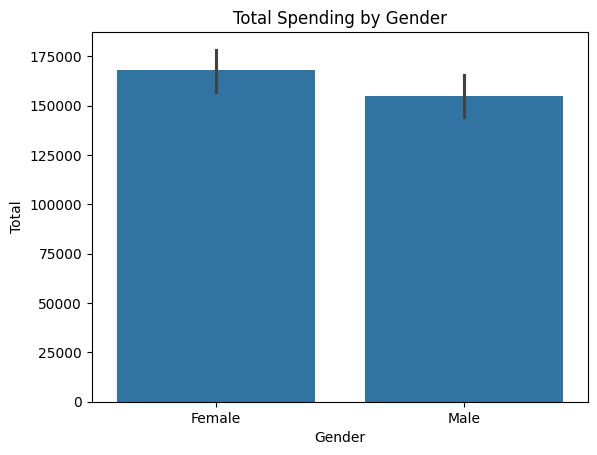

In [12]:
sns.barplot(x='Gender', y='Total', data=df, estimator=sum)
plt.title("Total Spending by Gender")
plt.show()

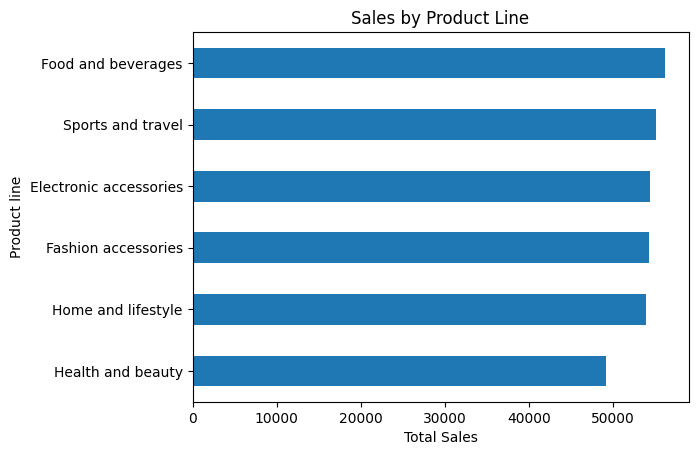

In [5]:
product_sales = df.groupby('Product line')['Total'].sum().sort_values()
product_sales.plot(kind='barh', title='Sales by Product Line')
plt.xlabel('Total Sales')
plt.show()


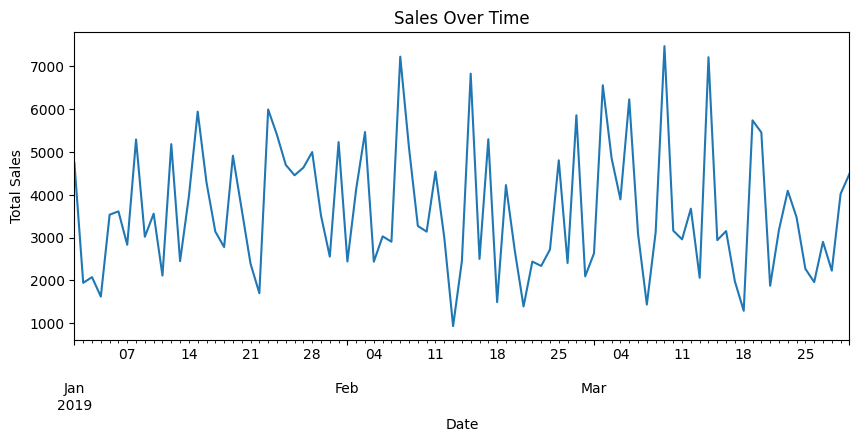

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
daily_sales = df.groupby('Date')['Total'].sum()
daily_sales.plot(figsize=(10,4), title='Sales Over Time')
plt.ylabel('Total Sales')
plt.show()

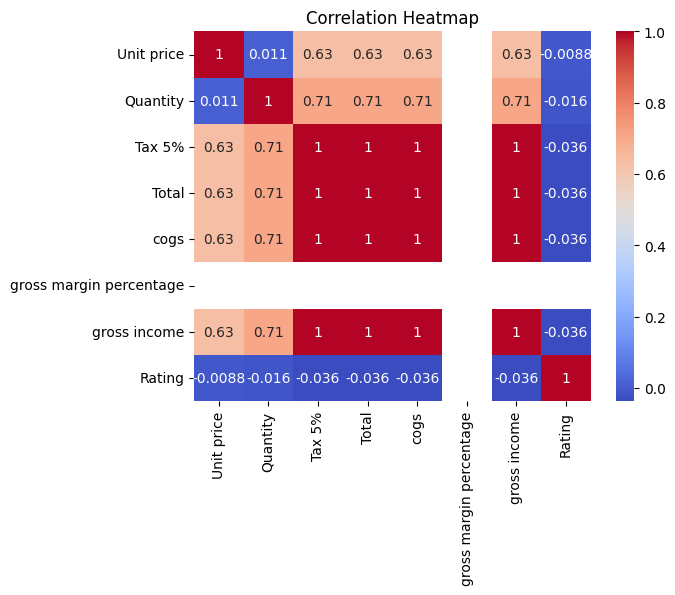

In [7]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
